In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tkr

In [3]:
#read in data
df = pd.read_csv('Data/ATUS/most_ATUS_merged_2018_dupes_dropped.csv')

In [4]:
df

,Unnamed: 0,Unnamed: 0_x,TUCASEID,TUACTIVITY_N_x,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,...,TEAGE_y,TERRP,TESEX_y,TXAGE,TXRRP,TXSEX,PEEDUCA,PTDTRACE,GEREG_y,GEREG
0,0,0,20180101180006,1,-1,0,-1,0,-1,-1,...,42,19,1,0,0,0,40,1,3,3
1,1,16,20180101180021,1,-1,0,-1,0,-1,-1,...,58,19,1,0,0,0,39,1,2,2
2,2,28,20180101180025,1,-1,0,-1,0,-1,-1,...,65,18,1,0,0,0,37,2,3,3
3,5,46,20180101180054,1,-1,0,-1,0,-1,-1,...,72,19,1,0,0,0,40,2,3,3
4,6,67,20180101180060,1,-1,0,-1,0,-1,-1,...,66,19,2,0,0,0,40,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9588,24219,183979,20181212182342,1,-1,0,-1,0,0,-1,...,69,18,2,0,0,0,39,1,2,2
9589,24222,184022,20181212182427,1,-1,0,-1,0,-1,-1,...,32,19,1,0,0,0,43,1,4,4
9590,24225,184041,20181212182503,1,-1,0,0,0,-1,0,...,17,18,1,0,0,0,36,4,1,1
9591,24231,184061,20181212182505,1,3,0,-1,0,-1,-1,...,58,19,2,0,0,0,44,1,3,3


In [18]:
df['PRTAGE'].describe()

count    9593.000000
mean       50.347962
std        18.123282
min        15.000000
25%        36.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: PRTAGE, dtype: float64

In [20]:
bins = pd.IntervalIndex.from_tuples([(15,17),(18, 29), (30, 44), (45, 59),(60,89)])


df['Age Group'] = pd.cut(df['PRTAGE'],bins,labels=['15-17','18-29','30-44','45-59','60-85'])

In [21]:
#function to reformat y axis into hours instead of minutes
def numfmt(x, pos):
    s = f'{x/60:,.0f}' #<----
    return s

yfmt = tkr.FuncFormatter(numfmt)

Text(0.07, -0.01, '**Data: American Time Use Survey 2018')

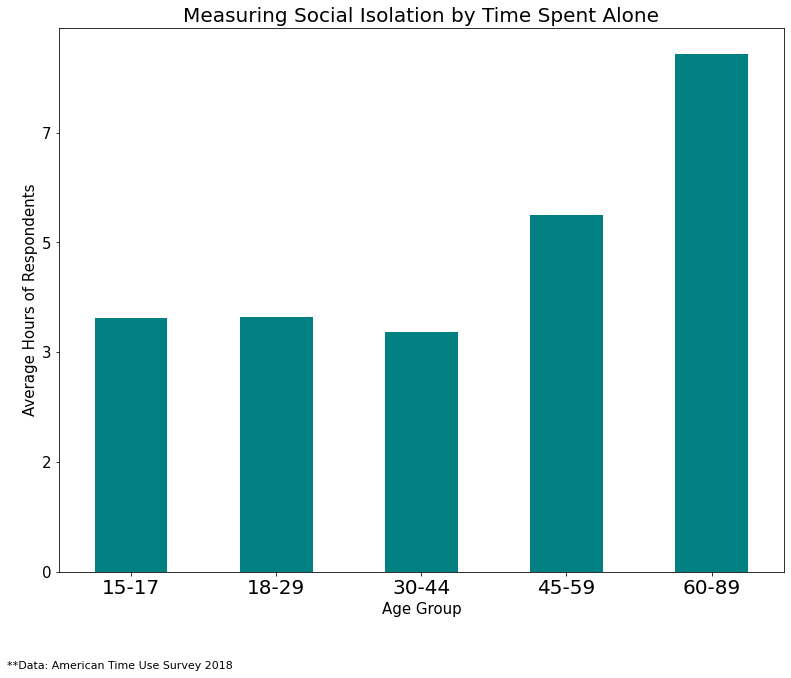

In [28]:
plt.figure(figsize=(20,100))
ax = df.groupby('Age Group')['TRTALONE'].describe()['mean'].plot.bar(figsize=(13,10),rot=0,color=['teal'])

plt.title('Measuring Social Isolation by Time Spent Alone', fontsize=20)
plt.ylabel('Average Hours of Respondents',fontsize=15)
plt.xlabel('Age Group',fontsize=15)
ax.tick_params(axis='y',labelsize=15)
ax.tick_params(axis='x', labelsize=20,rotation=0)
ax.set_xticklabels(['15-17','18-29','30-44','45-59','60-89'])
ax.yaxis.set_major_formatter(yfmt)
#ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()])
plt.figtext(0.07, -0.01,'**Data: American Time Use Survey 2018',fontsize=11)

<AxesSubplot:xlabel='Age Group'>

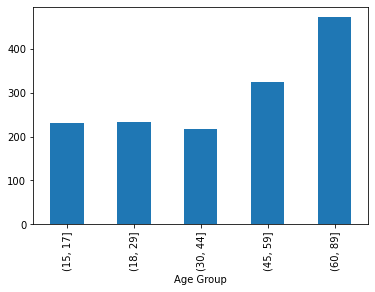

In [23]:
df.groupby('Age Group')['TRTALONE'].describe()['mean'].plot(kind='bar')

<AxesSubplot:xlabel='INCOME,D9C'>

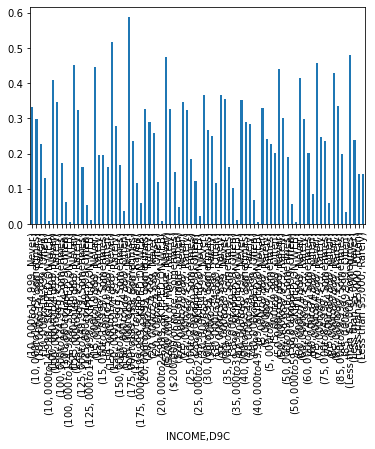

In [31]:
df_2018.groupby('INCOME')['D9C'].value_counts(normalize=True).plot(kind='bar')

In [50]:
df_2018['INCOME']

0         $25,000 to $29,999
1         $40,000 to $49,999
2       $100,000 to $124,999
3           $200,000 or more
4       $150,000 to $174,999
                ...         
1942      $25,000 to $29,999
1943        $5,000 to $9,999
1944      $75,000 to $84,999
1945      $85,000 to $99,999
1946      $15,000 to $19,999
Name: INCOME, Length: 1947, dtype: object

In [ ]:
for i in cats.columns:
    pd.crosstab(cats[i],df['Binary Rating'],normalize='index').plot(kind='bar')
    plt.title(i)
    plt.show()

## Check Correleations

<AxesSubplot:>

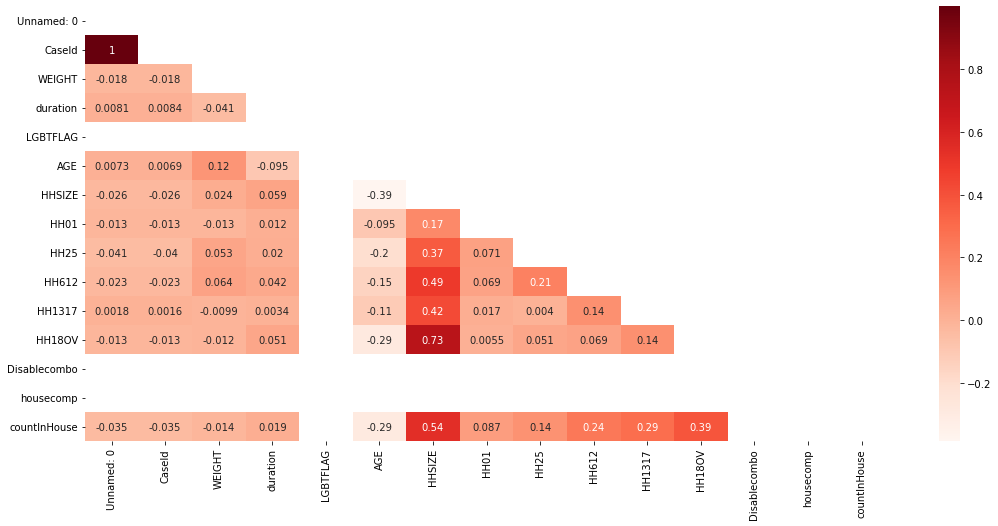

In [39]:
plt.figure(figsize=(18,8))
mask = np.triu(np.ones_like(df_2018.corr(), dtype=bool))
sns.heatmap(df_2018.corr(), mask=mask, annot = True, cmap='Reds')